Khai báo thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import model_selection

Đọc dữ liệu

In [ ]:
#loading dataset and running some basic methods to know more about the dataset
df = pd.read_csv('/content/drive/MyDrive/N6-KPDL/DATA/Fraud_100000.csv')

In [ ]:
#shape of the dataset
print('Số lượng mẫu của bộ dữ liệu là:', df.shape[0])
print('Số lượng thuộc tính của bộ dữ liệu là:', df.shape[1])

Số lượng mẫu của bộ dữ liệu là: 100000
Số lượng thuộc tính của bộ dữ liệu là: 11


Hiển thị 5 dòng dữ liệu đầu

In [ ]:
#first five rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,163,CASH_OUT,308111.57,C579038819,44557.0,0.00,C1641500582,0.00,308111.57,0,0
1,208,CASH_OUT,71776.66,C855719162,155404.0,83627.34,C1864910268,261527.00,333303.66,0,0
2,230,CASH_OUT,132365.25,C1622300668,0.0,0.00,C902286777,330397.09,462762.33,0,0
3,202,CASH_IN,101582.54,C1811031746,204.0,101786.54,C1438834194,165216.48,63633.94,0,0
4,282,CASH_OUT,216573.19,C1103316113,0.0,0.00,C1631597817,3944975.41,4161548.60,0,0


Hiển thị 5 dòng dữ liệu cuối

In [ ]:
#bottom five rows of the dataset
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
99995,236,PAYMENT,6309.66,C2030017739,0.00,0.00,M214005116,0.00,0.00,0,0
99996,154,CASH_IN,267924.37,C1398419060,6176190.87,6444115.24,C685793696,867025.83,599101.46,0,0
99997,548,PAYMENT,12713.40,C2034105902,0.00,0.00,M1976792676,0.00,0.00,0,0
99998,230,PAYMENT,43313.72,C743622569,59714.76,16401.04,M2096491066,0.00,0.00,0,0
99999,258,CASH_IN,186740.56,C783006959,52274.00,239014.56,C362656922,0.00,0.00,0,0


Kiểm tra dữ liệu khuyết thiếu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking for any null or missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Xử lý giá trị khuyết thiếu

1. Thay thế các giá trị khuyết thiếu bằng giá trị trung bình

In [ ]:
df_filled = df.fillna(df.mean())

<ipython-input-10-939c007b6345>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


2. Xóa các giá trị khuyết thiếu

In [ ]:
drop_df = df.dropna()
print(drop_df)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0       163  CASH_OUT  308111.57   C579038819       44557.00            0.00   
1       208  CASH_OUT   71776.66   C855719162      155404.00        83627.34   
2       230  CASH_OUT  132365.25  C1622300668           0.00            0.00   
3       202   CASH_IN  101582.54  C1811031746         204.00       101786.54   
4       282  CASH_OUT  216573.19  C1103316113           0.00            0.00   
...     ...       ...        ...          ...            ...             ...   
99995   236   PAYMENT    6309.66  C2030017739           0.00            0.00   
99996   154   CASH_IN  267924.37  C1398419060     6176190.87      6444115.24   
99997   548   PAYMENT   12713.40  C2034105902           0.00            0.00   
99998   230   PAYMENT   43313.72   C743622569       59714.76        16401.04   
99999   258   CASH_IN  186740.56   C783006959       52274.00       239014.56   

          nameDest  oldbalanceDest  new

3. Kiểm tra dữ liệu trùng lặp dữ liệu

In [ ]:
#checking for any duplicate data
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


Thống kê các giá trị định lượng

In [ ]:
#information regarding numerical columns
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.154890,1.775356e+05,8.251255e+05,8.470192e+05,1.102484e+06,1.224382e+06,0.001260,0.0
std,142.271348,5.302082e+05,2.844467e+06,2.881379e+06,3.473084e+06,3.697581e+06,0.035474,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.349414e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.500740e+04,1.372500e+04,0.000000e+00,1.364301e+05,2.156887e+05,0.000000,0.0
75%,334.000000,2.083878e+05,1.070988e+05,1.464063e+05,9.501907e+05,1.116909e+06,0.000000,0.0
max,736.000000,2.997943e+07,3.478348e+07,3.476673e+07,2.493709e+08,2.916677e+08,1.000000,0.0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Xử lý ngoại lai

1. Vẽ biểu đồ Boxplot

Đổi dữ liệu từ dạng định danh (object) về dạng số:

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['type'] = lb_make.fit_transform(df['type'])
df['nameOrig'] = lb_make.fit_transform(df['nameOrig'])
df['nameDest'] = lb_make.fit_transform(df['nameDest'])
df.info() # tái kiểm tra thuộc tính

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  int64  
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  int64  
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  int64  
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 8.4 MB


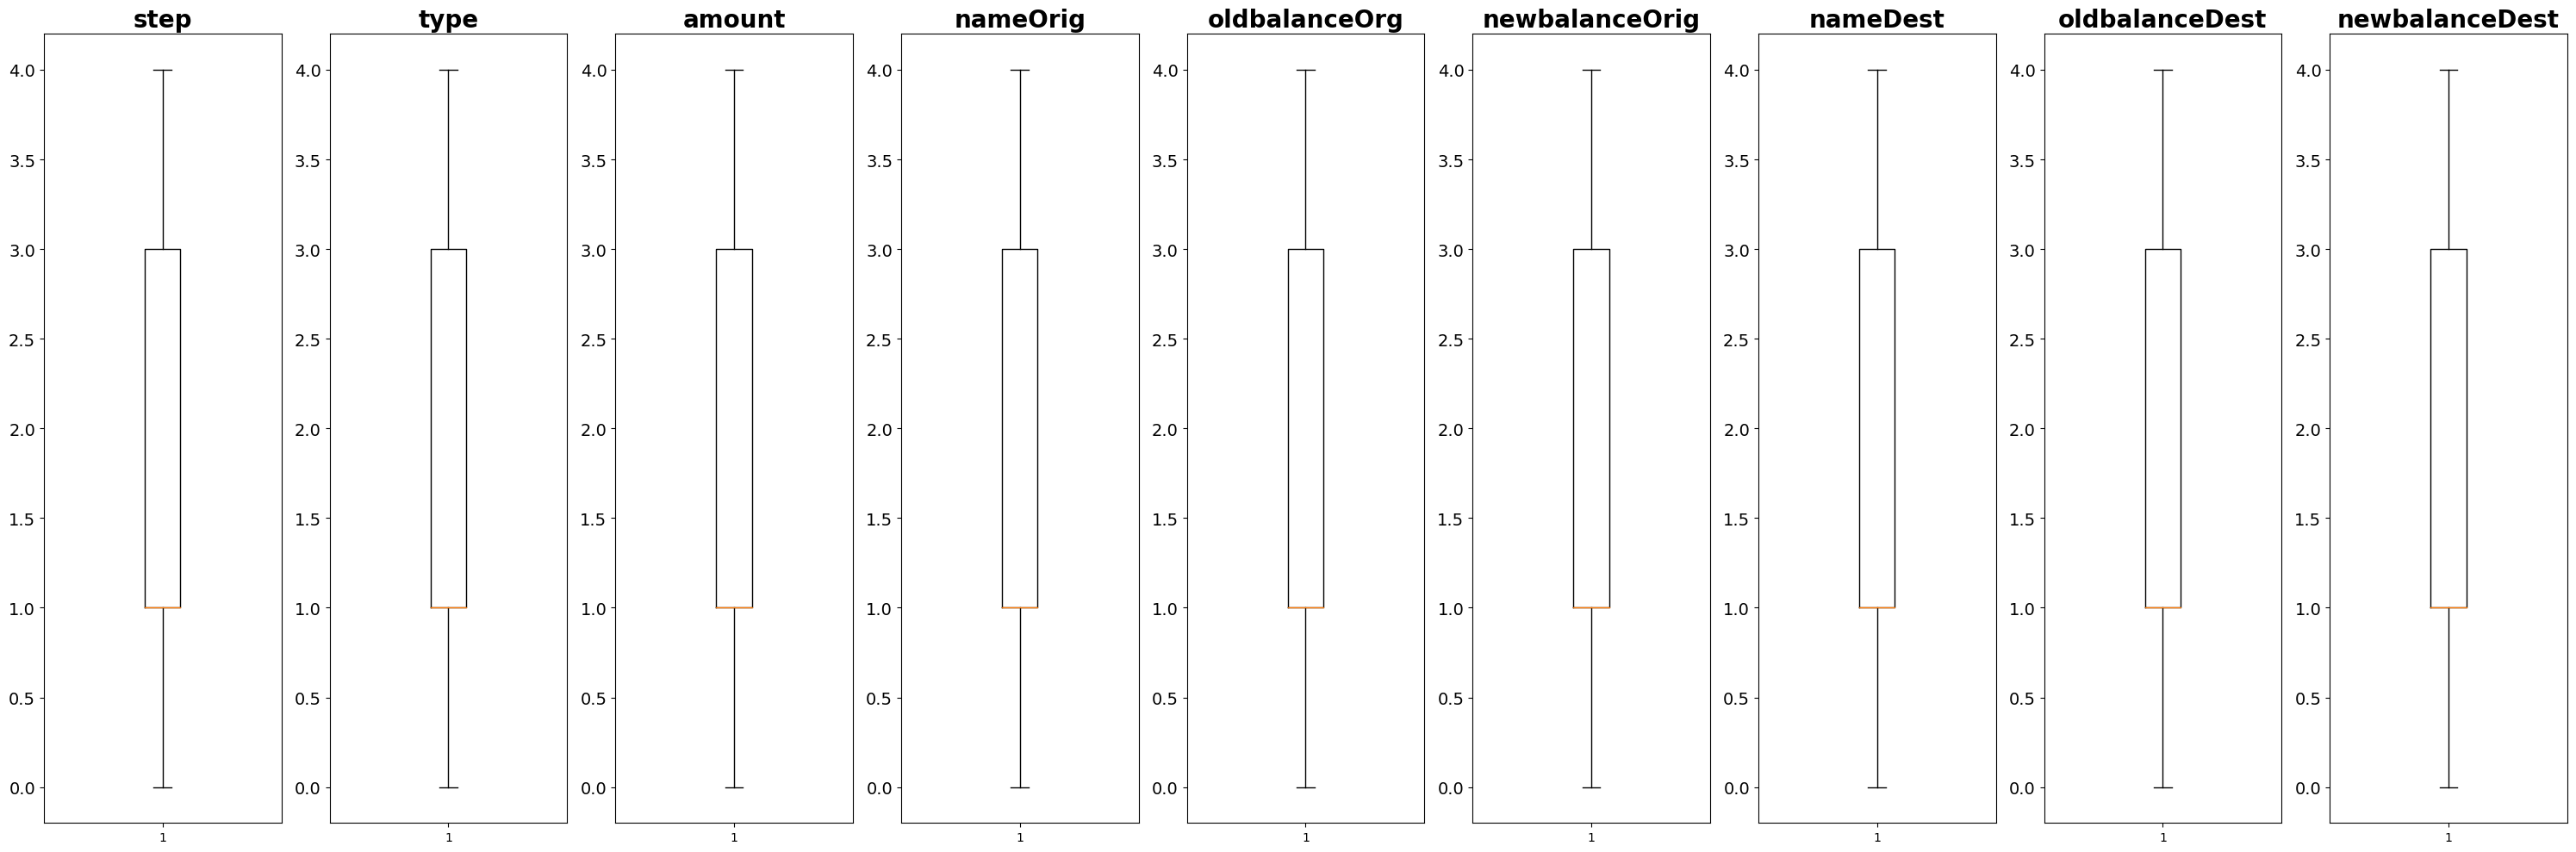

In [ ]:
new_cols = [col for col in df.columns if col in ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df1 = df[new_cols]
red_circle = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white') # tô màu đỏ cho các điểm ngoại lai trong đồ thị
fig, axs = plt.subplots(1, len(new_cols), figsize=(30,10)) # chuyền số cột df.columns với kích thước figsize=(30,10)
for i, ax in enumerate(axs.flat): # dùng vòng lặp for nhận tất cả các hàng từ khung dữ liệu cho các cột
        ax.boxplot(df1.iloc[:,1], flierprops=red_circle)
        ax.set_title(new_cols[i], fontsize=20, fontweight='bold') # thiết lập size và kiểu chữ cho tiêu đề
        ax.tick_params(axis='y', labelsize=14)
plt.tight_layout() # tạo khoảng trống cho các ô

Nhận xét:
Từ biểu đồ boxplot ta thấy các thuộc tính : ... có các giá trị ngoại lai.


2. Xử lý giá trị ngoại lai:
Có 2 hàm dưới đây để xử lý các giá trị ngoại lệ bằng các quy tắc sau:
- Tất cả các giá trị nhỏ hơn Lower Whisker sẽ được gán giá trị của Lower_whisker
- Tất cả các giá trị trên Upper Whisker sẽ được gán giá trị của Upper_Whisker

In [ ]:
def treat_outliers(df, col):
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75) # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df
def treat_outliers_all(df, col_list): # Loại bỏ giá trị ngoại lệ
    for a in col_list:
        df = treat_outliers(df,a)
    return df

3. Thực hiện loại bỏ giá trị ngoại lai

In [ ]:
new_cols = [col for col in df.columns if col in ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']]
# Xử lý ngoại lai
df = treat_outliers_all(df,new_cols)

* Vẽ biểu đồ Boxplot các giá trị ngoại lai đã được loại bỏ:

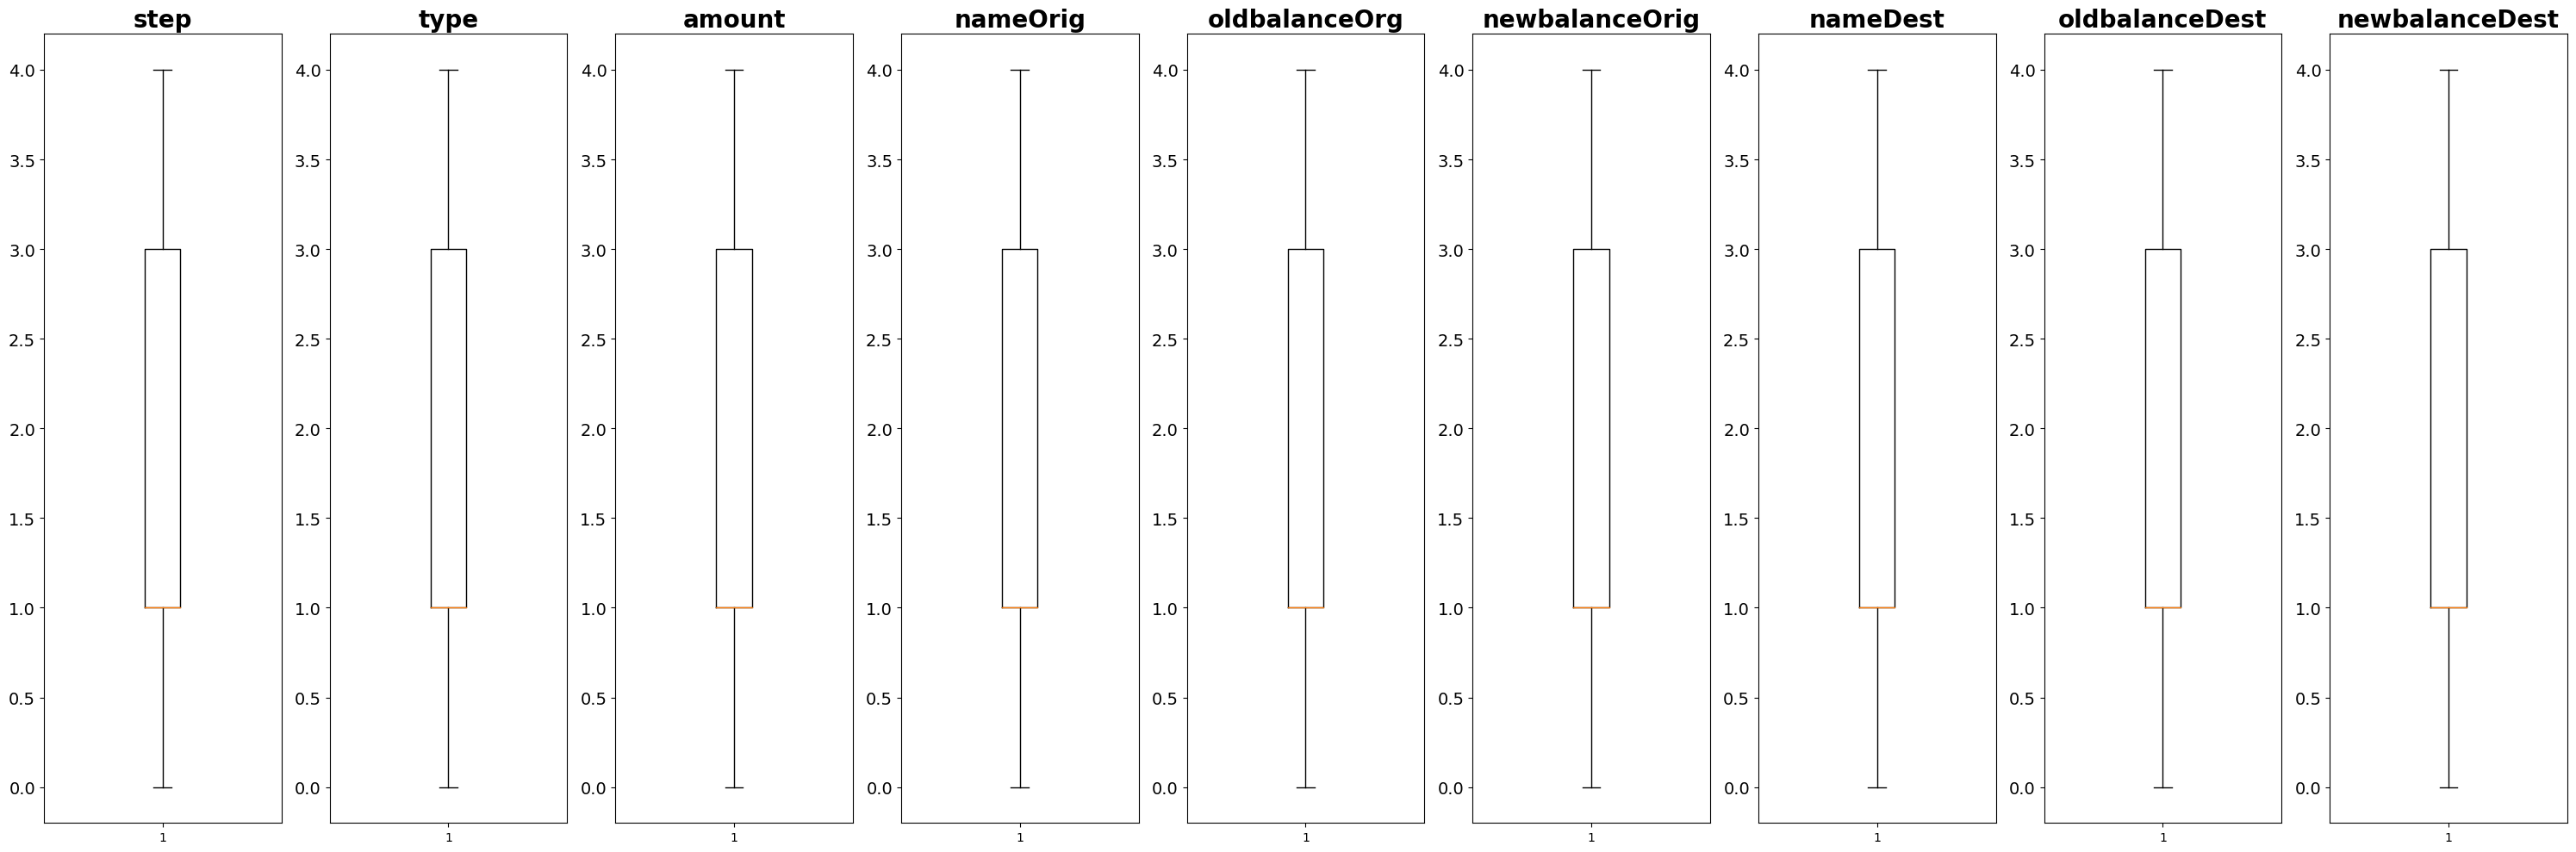

In [ ]:
new_cols = [col for col in df.columns if col in ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df1 = df[new_cols]
red_circle = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white') # tô màu đỏ cho các điểm ngoại lai trong đồ thị
fig, axs = plt.subplots(1, len(new_cols), figsize=(30,10)) # chuyền số cột df.columns với kích thước figsize=(30,10)
for i, ax in enumerate(axs.flat): # dùng vòng lặp for nhận tất cả các hàng từ khung dữ liệu cho các cột
        ax.boxplot(df1.iloc[:,1], flierprops=red_circle)
        ax.set_title(new_cols[i], fontsize=20, fontweight='bold') # thiết lập size và kiểu chữ cho tiêu đề
        ax.tick_params(axis='y', labelsize=14)
plt.tight_layout() # tạo khoảng trống cho các ô

4. Lưu file dữ liệu sau khi xử lý

In [ ]:
df.to_csv('/content/drive/MyDrive/N6-KPDL/DATA/Fraud_100000_tienxuly.csv', encoding='utf-8', index=False)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,163,1,308111.57,78175,44557.000,0.00,19352,0.000000e+00,3.081116e+05,0,0
1,208,1,71776.66,92564,155404.000,83627.34,26198,2.615270e+05,3.333037e+05,0,0
2,230,1,132365.25,32257,0.000,0.00,56012,3.303971e+05,4.627623e+05,0,0
3,202,0,101582.54,41985,204.000,101786.54,13303,1.652165e+05,6.363394e+04,0,0
4,282,1,216573.19,5393,0.000,0.00,19054,2.375477e+06,2.792273e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,236,3,6309.66,53422,0.000,0.00,79062,0.000000e+00,0.000000e+00,0,0
99996,154,0,267924.37,20766,267746.875,366015.80,49404,8.670258e+05,5.991015e+05,0,0
99997,548,3,12713.40,53638,0.000,0.00,76216,0.000000e+00,0.000000e+00,0,0
99998,230,3,43313.72,86636,59714.760,16401.04,78267,0.000000e+00,0.000000e+00,0,0


Đọc file dữ liệu mới

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/N6-KPDL/DATA/Fraud_100000_tienxuly.csv', engine = 'python', header=0, delimiter=',')
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,163,1,308111.57,78175,44557.000,0.00,19352,0.000000e+00,3.081116e+05,0,0
1,208,1,71776.66,92564,155404.000,83627.34,26198,2.615270e+05,3.333037e+05,0,0
2,230,1,132365.25,32257,0.000,0.00,56012,3.303971e+05,4.627623e+05,0,0
3,202,0,101582.54,41985,204.000,101786.54,13303,1.652165e+05,6.363394e+04,0,0
4,282,1,216573.19,5393,0.000,0.00,19054,2.375477e+06,2.792273e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,236,3,6309.66,53422,0.000,0.00,79062,0.000000e+00,0.000000e+00,0,0
99996,154,0,267924.37,20766,267746.875,366015.80,49404,8.670258e+05,5.991015e+05,0,0
99997,548,3,12713.40,53638,0.000,0.00,76216,0.000000e+00,0.000000e+00,0,0
99998,230,3,43313.72,86636,59714.760,16401.04,78267,0.000000e+00,0.000000e+00,0,0


Hiển thị kiểu dữ liệu của các thuộc tính:

In [ ]:
df.dtypes

step                int64
type                int64
amount            float64
nameOrig            int64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
#information about the columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  int64  
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  int64  
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  int64  
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 8.4 MB


# Thuật toán Decision Tree


In [ ]:
# Đọc file dữ liệu mới
df1 = pd.read_csv('/content/drive/MyDrive/KPDL_Data/N6-KPDL/DATA/Fraud_100000_tienxuly.csv', engine = 'python', header=0, delimiter=',')
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,163,1,308111.57,78175,44557.000,0.00,19352,0.000000e+00,3.081116e+05,0,0
1,208,1,71776.66,92564,155404.000,83627.34,26198,2.615270e+05,3.333037e+05,0,0
2,230,1,132365.25,32257,0.000,0.00,56012,3.303971e+05,4.627623e+05,0,0
3,202,0,101582.54,41985,204.000,101786.54,13303,1.652165e+05,6.363394e+04,0,0
4,282,1,216573.19,5393,0.000,0.00,19054,2.375477e+06,2.792273e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,236,3,6309.66,53422,0.000,0.00,79062,0.000000e+00,0.000000e+00,0,0
99996,154,0,267924.37,20766,267746.875,366015.80,49404,8.670258e+05,5.991015e+05,0,0
99997,548,3,12713.40,53638,0.000,0.00,76216,0.000000e+00,0.000000e+00,0,0
99998,230,3,43313.72,86636,59714.760,16401.04,78267,0.000000e+00,0.000000e+00,0,0


In [ ]:
#Hiển thị kiểu dữ liệu các thuộc tính
df1.dtypes

step                int64
type                int64
amount            float64
nameOrig            int64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
#Xem dữ liệu isFraud
df1['isFraud'].value_counts()

0    99874
1      126
Name: isFraud, dtype: int64

In [ ]:
max_value = df1['amount'].max()
min_value = df1['amount'].min()
mean_value = df1['amount'].mean()

print(f'Giá trị cao nhất: {max_value}')
print(f'Giá trị thấp nhất: {min_value}')
print(f'Giá trị trung bình: {mean_value}')

Giá trị cao nhất: 500728.27375
Giá trị thấp nhất: 0.3
Giá trị trung bình: 132121.081841425


In [ ]:
# Chuyển dữ liệu từ các cột sang dạng rời rạc gồm 3 giá trị : Low, Medium, High
df1['oldbalanceOrg_pt'] = pd.qcut(df1['oldbalanceOrg'], 3, labels=['bottom', 'middle', 'top'])
df1['oldbalanceDest_pt'] = pd.qcut(df1['oldbalanceDest'],4 , labels=['bottom','middle', 'top'], duplicates='drop')
df1['newbalanceDest_qt'] = pd.qcut(df1['newbalanceDest'], 4, labels=['bottom', 'middle', 'top'], duplicates='drop')

In [ ]:
#Chuyển dữ liệu cột amount từ liên tục sang rời rạc gồm 3 giá trị: Low, Medium, High
cut_labels = ['Low', 'Medium', 'High']
cut_bins = [0.3, 7000, 140000, 500728.27375] #0,3 là giá trị min, 500728.27375 là giá trị max của amount
df1['amount_label'] = pd.cut(df['amount'], bins = cut_bins, labels = cut_labels)


In [ ]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbalanceOrg_pt,oldbalanceDest_pt,newbalanceDest_qt,amount_label
0,163,1,308111.57,78175,44557.000,0.00,19352,0.000000e+00,3.081116e+05,0,0,middle,bottom,middle,High
1,208,1,71776.66,92564,155404.000,83627.34,26198,2.615270e+05,3.333037e+05,0,0,top,middle,middle,Medium
2,230,1,132365.25,32257,0.000,0.00,56012,3.303971e+05,4.627623e+05,0,0,bottom,middle,middle,Medium
3,202,0,101582.54,41985,204.000,101786.54,13303,1.652165e+05,6.363394e+04,0,0,middle,middle,bottom,Medium
4,282,1,216573.19,5393,0.000,0.00,19054,2.375477e+06,2.792273e+06,0,0,bottom,top,top,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,236,3,6309.66,53422,0.000,0.00,79062,0.000000e+00,0.000000e+00,0,0,bottom,bottom,bottom,Low
99996,154,0,267924.37,20766,267746.875,366015.80,49404,8.670258e+05,5.991015e+05,0,0,top,middle,middle,High
99997,548,3,12713.40,53638,0.000,0.00,76216,0.000000e+00,0.000000e+00,0,0,bottom,bottom,bottom,Medium
99998,230,3,43313.72,86636,59714.760,16401.04,78267,0.000000e+00,0.000000e+00,0,0,top,bottom,bottom,Medium


In [ ]:
#Xóa cột amount, step, oldbalanceOrg, oldbalanceDest, newbalanceDest
df1.drop('amount', axis =1, inplace = True)
df1.drop('oldbalanceOrg', axis =1, inplace = True)
df1.drop('oldbalanceDest', axis =1, inplace = True)
df1.drop('newbalanceDest', axis =1, inplace = True)

In [ ]:
df1

,step,type,nameOrig,newbalanceOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg_pt,oldbalanceDest_pt,newbalanceDest_qt,amount_label
0,163,1,78175,0.00,19352,0,0,middle,bottom,middle,High
1,208,1,92564,83627.34,26198,0,0,top,middle,middle,Medium
2,230,1,32257,0.00,56012,0,0,bottom,middle,middle,Medium
3,202,0,41985,101786.54,13303,0,0,middle,middle,bottom,Medium
4,282,1,5393,0.00,19054,0,0,bottom,top,top,High
...,...,...,...,...,...,...,...,...,...,...,...
99995,236,3,53422,0.00,79062,0,0,bottom,bottom,bottom,Low
99996,154,0,20766,366015.80,49404,0,0,top,middle,middle,High
99997,548,3,53638,0.00,76216,0,0,bottom,bottom,bottom,Medium
99998,230,3,86636,16401.04,78267,0,0,top,bottom,bottom,Medium


In [ ]:
df1['amount_label'] = lb_make.fit_transform(df1['amount_label'])
df1['oldbalanceOrg_pt'] = lb_make.fit_transform(df1['oldbalanceOrg_pt'])
df1['oldbalanceDest_pt'] = lb_make.fit_transform(df1['oldbalanceDest_pt'])
df1['newbalanceDest_qt'] = lb_make.fit_transform(df1['newbalanceDest_qt'])
df1.info() # tái kiểm tra thuộc tính

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   step               100000 non-null  int64  
 1   type               100000 non-null  int64  
 2   nameOrig           100000 non-null  int64  
 3   newbalanceOrig     100000 non-null  float64
 4   nameDest           100000 non-null  int64  
 5   isFraud            100000 non-null  int64  
 6   isFlaggedFraud     100000 non-null  int64  
 7   oldbalanceOrg_pt   100000 non-null  int64  
 8   oldbalanceDest_pt  100000 non-null  int64  
 9   newbalanceDest_qt  100000 non-null  int64  
 10  amount_label       100000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 8.4 MB


In [ ]:
#Chuẩn bị dữ liệu để train model
features =['step', 'type', 'amount_label', 'newbalanceDest_qt','oldbalanceDest_pt', 'oldbalanceOrg_pt', 'newbalanceOrig']
target = ['isFraud']
x = df1[features]
y = df1[target]

In [ ]:
#In ra mảng dữ liệu
print(x.shape)
print(y.shape)

(100000, 7)
(100000, 1)


In [ ]:
#Khai báo thư viện
from sklearn.model_selection import train_test_split
#Xây dựng mô hình
x_train, x_test, y_train, y_test = train_test_split (x, y, random_state = 100, test_size=0.1) # Chia tập dữ liệu làm 2 tập train và test với test size là 20%


In [ ]:
#Xây dựng cây
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model_mytree = DecisionTreeClassifier()
model_mytree.fit(x_train, y_train)


DecisionTreeClassifier()

In [ ]:
#Dự đoán trên dữ liệu test
y_pred = model_mytree.predict(x_test)


In [ ]:
#In ra kết quả
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print("Ma trận nhầm lẫn")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Báo cáo phân loại")
print(classification_report(y_test, y_pred))
print('\n')


Accuracy:  99.87
Ma trận nhầm lẫn
[[9983    3]
 [  10    4]]


Báo cáo phân loại
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9986
           1       0.57      0.29      0.38        14

    accuracy                           1.00     10000
   macro avg       0.79      0.64      0.69     10000
weighted avg       1.00      1.00      1.00     10000



